In [2]:
%env OMP_NUM_THREADS=1
%env NUMEXPR_MAX_THREADS=1

import numpy as np
import matplotlib.pyplot as plt
import dedalus.public as d3
import logging
logger = logging.getLogger(__name__)
import xarray as xr

import h5py
import cartopy.crs as ccrs
    
from mydedalustools import *    

%load_ext autoreload
%autoreload 2

SNAPSHOTS_DIR = "/pscratch/sd/q/qnicolas/stationarywave_snapshots/"

env: OMP_NUM_THREADS=1
env: NUMEXPR_MAX_THREADS=1


/global/common/software/m3310/conda/dedalus3/lib/python3.11/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [3]:
# Simulation units
meter = 1 / 6.37122e6
hour = 1
second = hour / 3600
day = hour*24
Kelvin = 1

# Earth parameters
R0 = 6.4e6*meter
Omega = 2*np.pi/86400 / second

# Topographic Rossby wave

In [147]:
snapshot_id = 'stationarywave_2level_T64_rhs'
zonaljet1 = open_h5s(snapshot_id,('s1',),SNAPSHOTS_DIR=SNAPSHOTS_DIR)
zonaljet1 = concat_levels(zonaljet1 ,2)


In [148]:
snapshot_id = 'stationarywave_2level_T64_lhs'
zonaljet2 = open_h5s(snapshot_id,('s1',),SNAPSHOTS_DIR=SNAPSHOTS_DIR)
zonaljet2 = concat_levels(zonaljet2 ,2)


In [158]:
snapshot_id = 'stationarywave_2level_T64_explicit'
zonaljet3 = open_h5s(snapshot_id,('s1',),SNAPSHOTS_DIR=SNAPSHOTS_DIR)
zonaljet3 = concat_levels(zonaljet3 ,2)


In [7]:
snapshot_id = 'stationarywave_5level_T64_topo'
zonaljet_west = open_h5s(snapshot_id,('s1',),SNAPSHOTS_DIR=SNAPSHOTS_DIR)
zonaljet_west = concat_levels(zonaljet_west ,5)


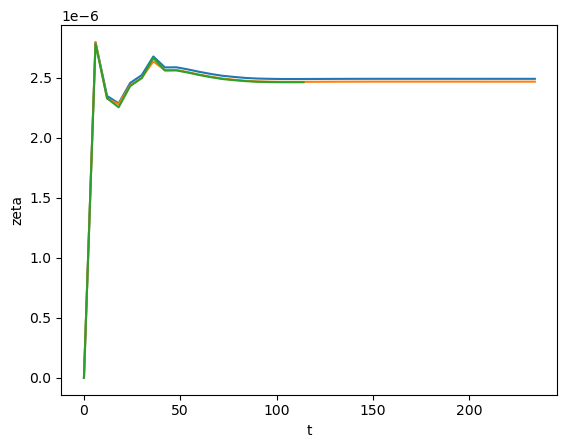

In [159]:
(zonaljet1.zeta**2).mean(('longitude','latitude','sigma')).plot()
(zonaljet2.zeta**2).mean(('longitude','latitude','sigma')).plot()
(zonaljet3.zeta**2).mean(('longitude','latitude','sigma')).plot()

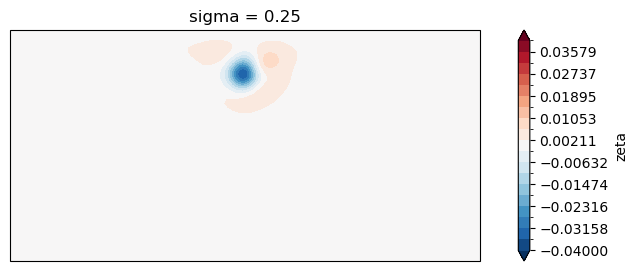

In [162]:
_,ax=plt.subplots(1,1,figsize=(10,3),subplot_kw={'projection':ccrs.PlateCarree()})
zonaljet1.zeta.isel(sigma=0).sel(t=slice(100,110)).mean('t').transpose().plot.contourf(ax=ax,levels=np.linspace(-1.2,1.2,20)/30,extend='both',transform=ccrs.PlateCarree())


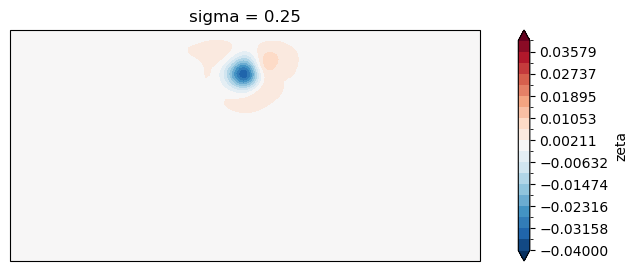

In [163]:
_,ax=plt.subplots(1,1,figsize=(10,3),subplot_kw={'projection':ccrs.PlateCarree()})
zonaljet2.zeta.isel(sigma=0).sel(t=slice(100,110)).mean('t').transpose().plot.contourf(ax=ax,levels=np.linspace(-1.2,1.2,20)/30,extend='both',transform=ccrs.PlateCarree())


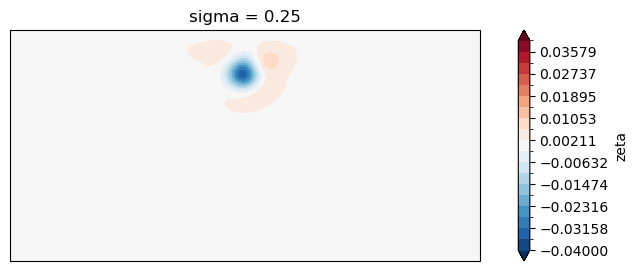

In [164]:
_,ax=plt.subplots(1,1,figsize=(10,3),subplot_kw={'projection':ccrs.PlateCarree()})
zonaljet3.zeta.isel(sigma=0).sel(t=slice(100,110)).mean('t').transpose().plot.contourf(ax=ax,levels=np.linspace(-1.2,1.2,20)/30,extend='both',transform=ccrs.PlateCarree())


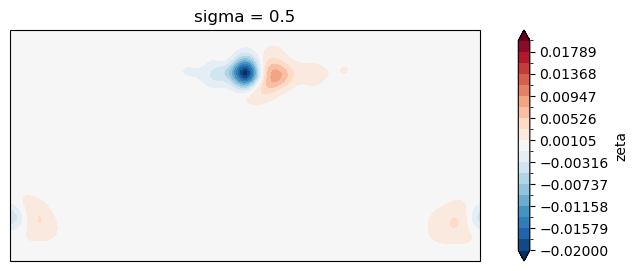

In [10]:
_,ax=plt.subplots(1,1,figsize=(10,3),subplot_kw={'projection':ccrs.PlateCarree()})
zonaljet_west.zeta.isel(sigma=2).sel(t=slice(15,20)).mean('t').transpose().plot.contourf(ax=ax,levels=np.linspace(-1.2,1.2,20)/60,extend='both',transform=ccrs.PlateCarree())


# Gill pattern

In [39]:
snapshot_id = 'stationarywave_5level_T64_heating'
gill = open_h5s(snapshot_id,('s1',),SNAPSHOTS_DIR=SNAPSHOTS_DIR)
gill = concat_levels(gill ,5)


In [31]:
snapshot_id = 'stationarywave_2level_T64_heating_test'
gill = open_h5s(snapshot_id,('s1',),SNAPSHOTS_DIR=SNAPSHOTS_DIR)
gill = concat_levels(gill ,2)


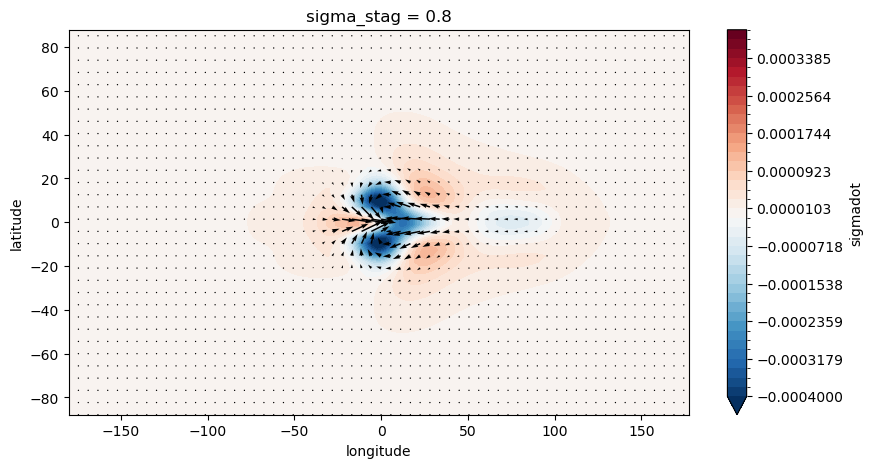

In [62]:
_,ax=plt.subplots(1,1,figsize=(10,5))
TT = gill.sigmadot.isel(sigma_stag=3).sel(t=slice(100,110)).mean('t').transpose()
uu = gill.u.isel(sigma=3).sel(t=slice(100,110)).mean('t')
u= uu[0].transpose()
v=-uu[1].transpose()
TT.plot.contourf(ax=ax,levels=np.linspace(-4e-5,4e-5,40)*10)
n=2; m=n
X = u.latitude.expand_dims({"longitude":u.longitude}).transpose()
Y = u.longitude.expand_dims({"latitude":u.latitude})
Q = ax.quiver(np.array(Y)[::n,::m],np.array(X)[::n,::m], np.array(u)[::n,::m], np.array(v)[::n,::m],color="k",scale=0.03)



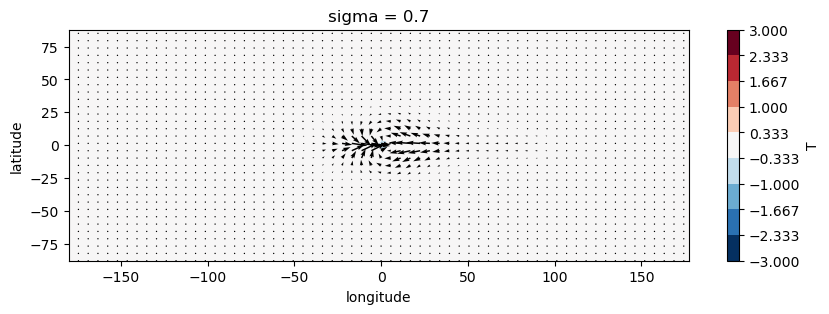

In [52]:
_,ax=plt.subplots(1,1,figsize=(10,3))
TT = gill.T.isel(sigma=3).sel(t=slice(100,110)).mean('t').transpose()
uu = gill.u.isel(sigma=3).sel(t=slice(100,110)).mean('t')
u= uu[0].transpose()
v=-uu[1].transpose()
TT.plot.contourf(ax=ax,levels=np.linspace(-3,3,10))
n=2; m=n
X = u.latitude.expand_dims({"longitude":u.longitude}).transpose()
Y = u.longitude.expand_dims({"latitude":u.latitude})
Q = ax.quiver(np.array(Y)[::n,::m],np.array(X)[::n,::m], np.array(u)[::n,::m], np.array(v)[::n,::m],color="k",scale=0.04)



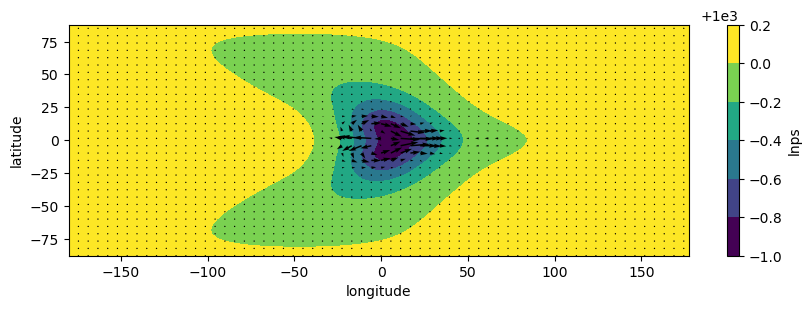

In [29]:
_,ax=plt.subplots(1,1,figsize=(10,3))
TT = 1e3*np.exp(gill.lnps.sel(t=slice(100,110)).mean('t').transpose())
uu = gill.u.isel(sigma=2).sel(t=slice(100,110)).mean('t')
u= uu[0].transpose()
v=-uu[1].transpose()
TT.plot.contourf(ax=ax)#,levels=np.linspace(950,1050,10))
n=2; m=n
X = u.latitude.expand_dims({"longitude":u.longitude}).transpose()
Y = u.longitude.expand_dims({"latitude":u.latitude})
Q = ax.quiver(np.array(Y)[::n,::m],np.array(X)[::n,::m], np.array(u)[::n,::m], np.array(v)[::n,::m],color="k",scale=0.05)



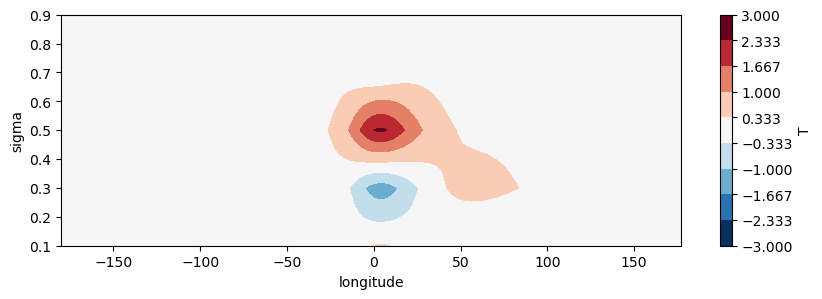

In [22]:
_,ax=plt.subplots(1,1,figsize=(10,3))
gill.T.sel(latitude=slice(-2,2),t=slice(100,110)).mean(('t','latitude')).plot.contourf(ax=ax,y='sigma',levels=np.linspace(-3,3,10))


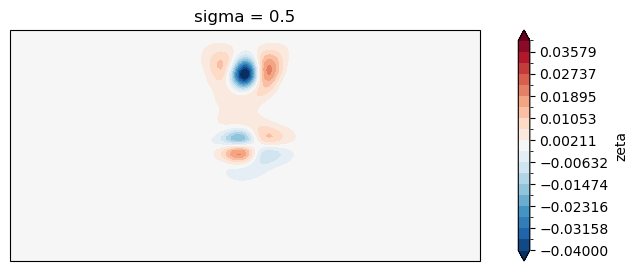

In [4]:
_,ax=plt.subplots(1,1,figsize=(10,3),subplot_kw={'projection':ccrs.PlateCarree()})
gill.zeta.isel(sigma=2).sel(t=slice(100,110)).mean('t').transpose().plot.contourf(ax=ax,levels=np.linspace(-1.2,1.2,20)/30,extend='both',transform=ccrs.PlateCarree())
